# Practica 1
## Diego Rodríguez y Alejandro Jiménez
## Grupo 1463

In [1]:
from abc import ABCMeta,abstractmethod
import pandas as pd
import numpy as np
from Datos import *
from EstrategiaParticionado import *
from Clasificador import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


# Implementación Propia
## Tic-tac-toe

In [2]:
datos = Datos('./ConjuntoDatos/tic-tac-toe.data')
# Validacion simple con 100 iteraciones
vs = ValidacionSimple(0.30, 100)
# Validación simple con 60 folds
vc = ValidacionCruzada(60)
# Creación del clasificador
nb = ClasificadorNaiveBayes()
# Cálculo de errores
mio_tic_simple = nb.validacion(vs, {"nombre": "naiveBayes", "laplace": False}, datos)
print("Error con validación simple sin laplace: " + str(mio_tic_simple))
mio_tic_simple_laplace = nb.validacion(vs, {"nombre": "naiveBayes", "laplace": True}, datos)
print("Error con validación simple con laplace: " + str(mio_tic_simple_laplace))
mio_tic_cruzada = nb.validacion(vc, {"nombre": "naiveBayes", "laplace": False}, datos)
print("Error con validación cruzada sin laplace: " + str(mio_tic_cruzada))
mio_tic_cruzada_laplace = nb.validacion(vc, {"nombre": "naiveBayes", "laplace": True}, datos)
print("Error con validación cruzada con laplace: " + str(mio_tic_cruzada_laplace))

Error con validación simple sin laplace: 0.2899651567944251
Error con validación simple con laplace: 0.29193379790940777
Error con validación cruzada sin laplace: 0.3060416666666666
Error con validación cruzada con laplace: 0.30590277777777775


## Espacio ROC

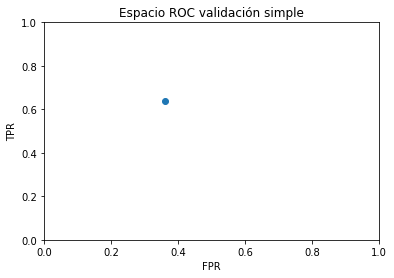

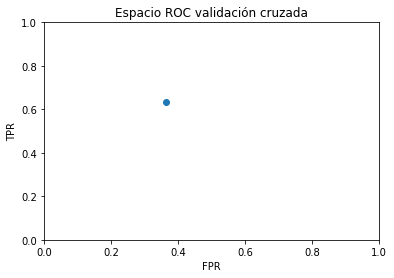

In [3]:
ROCpoint_simple = nb.espacioROC(vs, {"nombre": "naiveBayes", "laplace": True}, datos)
plt.title('Espacio ROC validación simple')
plt.plot(ROCpoint_simple[1], ROCpoint_simple[0], 'o-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

ROCpoint_simple = nb.espacioROC(vc, {"nombre": "naiveBayes", "laplace": True}, datos)
plt.title('Espacio ROC validación cruzada')
plt.plot(ROCpoint_simple[1], ROCpoint_simple[0], 'o-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## German

In [5]:
datos = Datos('./ConjuntoDatos/german.data')
# Validacion simple con 20 iteraciones
vs = ValidacionSimple(0.30, 20)
# Validación simple con 5 folds
vc = ValidacionCruzada(5)
# Creación del clasificador
nb = ClasificadorNaiveBayes()
# Cálculo de errores
mio_german_simple = nb.validacion(vs, {"nombre": "naiveBayes", "laplace": False}, datos)
print("Error con validación simple sin laplace: " + str(mio_tic_simple))
mio_german_simple_laplace = nb.validacion(vs, {"nombre": "naiveBayes", "laplace": True}, datos)
print("Error con validación simple con laplace: " + str(mio_tic_simple_laplace))
mio_german_cruzada = nb.validacion(vc, {"nombre": "naiveBayes", "laplace": False}, datos)
print("Error con validación cruzada sin laplace: " + str(mio_tic_cruzada))
mio_german_cruzada_laplace = nb.validacion(vc, {"nombre": "naiveBayes", "laplace": True}, datos)
print("Error con validación cruzada con laplace: " + str(mio_german_cruzada_laplace))

Error con validación simple sin laplace: 0.2999651567944251
Error con validación simple con laplace: 0.2982578397212544
Error con validación cruzada sin laplace: 0.3104166666666667
Error con validación cruzada con laplace: 0.2545


## ESPACIO ROC

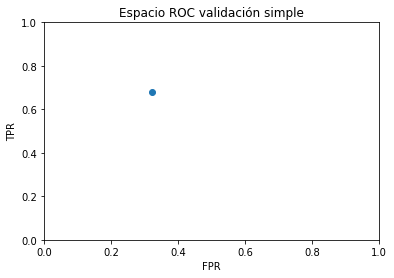

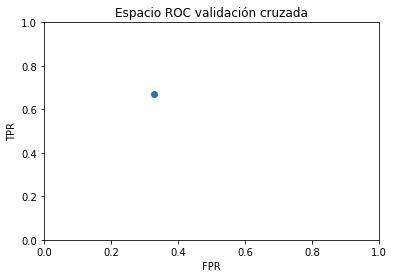

In [6]:
ROCpoint_simple = nb.espacioROC(vs, {"nombre": "naiveBayes", "laplace": True}, datos)
plt.title('Espacio ROC validación simple')
plt.plot(ROCpoint_simple[1], ROCpoint_simple[0], 'o-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

ROCpoint_simple = nb.espacioROC(vc, {"nombre": "naiveBayes", "laplace": True}, datos)
plt.title('Espacio ROC validación cruzada')
plt.plot(ROCpoint_simple[1], ROCpoint_simple[0], 'o-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Scikit Learn
## Tic-tac-toe

In [7]:
data = pd.read_csv('./ConjuntoDatos/tic-tac-toe.data')

# One hot encoding all columns but the class column
X_data = pd.get_dummies(data.iloc[:, :-1])
Y_data = data.iloc[:, -1]

#### Split dataset for simple validation
xTrain, xTest, yTrain, yTest = train_test_split(X_data, Y_data, test_size=0.3)
clf_s = GaussianNB()
# Train classifier
score = 0
part = 1000
for _ in range(part):
    xTrain, xTest, yTrain, yTest = train_test_split(X_data, Y_data, test_size=0.3)
    # Train classifier
    clf_s.fit(xTrain, yTrain)
    # Validate classifier
    score += clf_s.score(xTest, yTest)
sk_tic_simple = 1 - score / part
print("Error con validación simple:" + str(sk_tic_simple))

#### Same calculation for cross validation wit 60 folds
clf_c = GaussianNB()
scores = cross_val_score(clf_c, X_data, Y_data, cv=50)
sk_tic_cruzada = (1 - scores).mean()
print("Error con validación cruzada:" + str(sk_tic_cruzada))


Error con validación simple:0.3269236111111109
Error con validación cruzada:0.3542105263157895


## German

In [8]:
data = pd.read_csv('./ConjuntoDatos/german.data')

# One hot encoding all columns but the class column
X_data = pd.get_dummies(data.iloc[:, :-1])
Y_data = data.iloc[:, -1]

clf_s = GaussianNB()

score = 0
part = 1000
for _ in range(part):
    xTrain, xTest, yTrain, yTest = train_test_split(X_data, Y_data, test_size=0.3)
    # Train classifier
    clf_s.fit(xTrain, yTrain)
    # Validate classifier
    score += clf_s.score(xTest, yTest)
sk_german_simple = 1 - score / part
print("Error con validación simple:" + str(sk_german_simple))

#### Same calculation for cross validation wit 60 folds
clf_c = GaussianNB()
scores = cross_val_score(clf_c, X_data, Y_data, cv=60)
sk_german_cruzada = (1 - scores).mean()
print("Error con validación cruzada:" + str(sk_german_cruzada))

Error con validación simple:0.2874499999999953
Error con validación cruzada:0.2810049019607843


# Análisis de resultados
Se puede observar que la implementación propia ha obtenido mejores resultados que la obtenida con sklearn.
Creemos que esto puede ser debido a que en sklearn hemos usado one hot encoding para pasar convertir los atributos nominales en contínuos. Quizás esta no sea la mejor opción debido a que Naive Bayes asume independencia entre coumnas. Sin embargo, en el caso del Tic Tac Toe, se crearían 3 nuevos atributos por cada atributo primitivo (1 para x, otro para o y otro para b), y estos están claramente relacionados, pues solo 1 de ellos puede ser 1 y el resto deben ser 0.


Teniendo en cuenta eso anterior, nuestra hipótesis es que ese error que inducimos en el clasificador más el propio error de el algoritmo Gaussiano causan que el error sea mayor que en el algorítmo implementado por nosotros.

Como alternativa a esta implementación en sklearn hay dos que creo que serían más eficaces:

1. Utilizar label encoding en vez de one hot encoding. De esta manera eliminaríamos el problema de la relación entre subatributos provenientes de un atributo primitivo. Esta posibilidad creemos que podría funcionar mejor que nuestra implementación. Sin embargo no tenemos seguridad total.

2. Utilizar ambos MultinomialNB y GaussianNB: De esta forma se puede entrenar los atributos categóricos con el clasificador multinomial y los continuos con el gausiano. Una vez se tengan calculados se crea una tabla de probabilidades para cada uno de ellos utilizando 'predict_proba' y posterior mente uniendo las 2 matrices de probabilidades en un único dataframe. Lo único que faltaría para concluir sería entrenar un clasificador de Bayes Gaussiano con este último dataframe. De esta forma creemos que se obtendría menor error en la clasificación de variables nominales al principio, pero tampoco sabemos con certeza como afectaría el entrenamiento del clasificador final. 
